### **Import Library and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML_Proj/diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### **Exploring the Data**

In [ ]:
## First check null entries
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
## Now, check for duplicate rows
data.drop_duplicates(inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#### **Analysis for gender**


In [ ]:
data['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [ ]:
## Do Label Encoding for gender column
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


#### **Analysis for smoking_history**


In [ ]:
data['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [ ]:
# Convert smoking history to numerical format
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
data['smoking_history'] = data['smoking_history'].map(smoking_history_mapping)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,0.029143,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,0.993422,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,-1.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


#### **Analysis for age**


<Axes: >

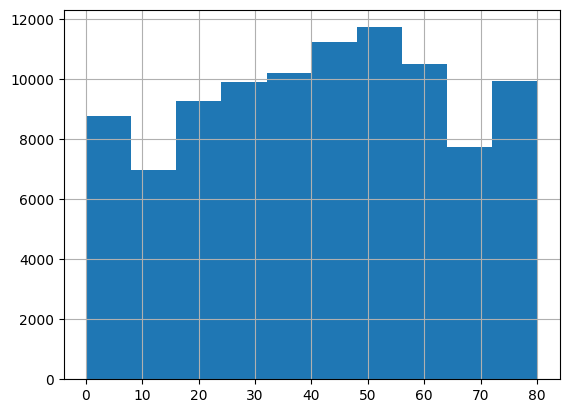

In [ ]:
data['age'].hist()

In [ ]:
#Remove all records where age is given in decimal
data = data[data['age'].mod(1) == 0]
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
## convert age column datatype to int
data['age'] = data['age'].astype(int)
data.head()

<ipython-input-63-dfb173f11243>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,-1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int64  
 1   age                  94133 non-null  int64  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  int64  
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 MB


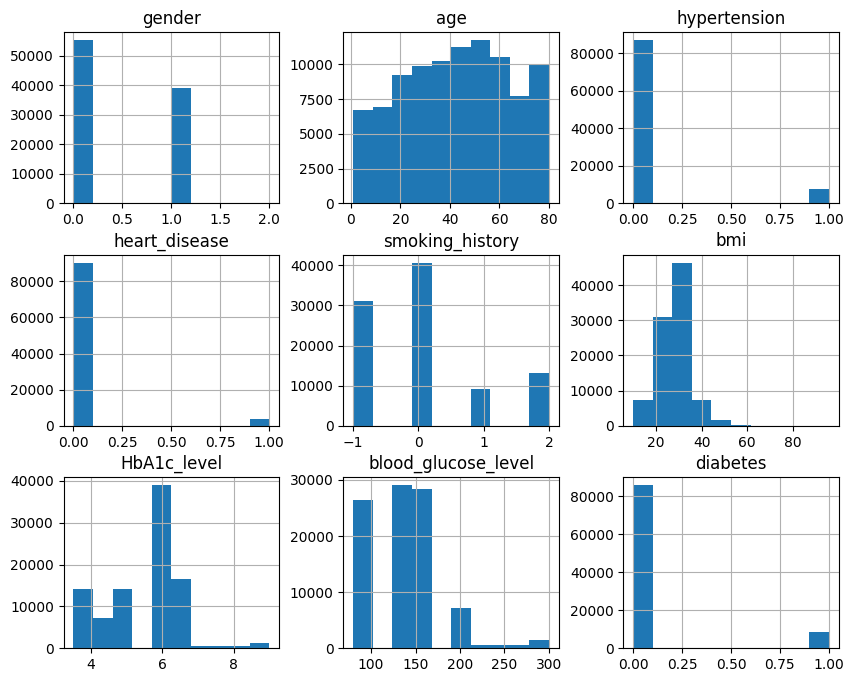

In [ ]:
data.hist(bins=10, figsize=(10,8))
plt.show()

#### **Analysis for diabetes**


In [ ]:
data['diabetes'].value_counts()

0    85651
1     8482
Name: diabetes, dtype: int64

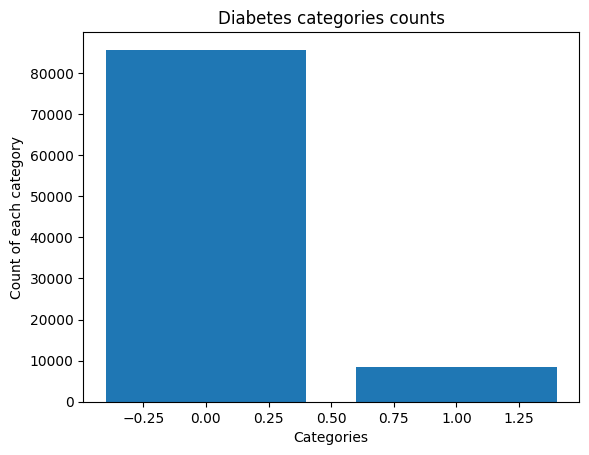

Count_of_0%: 90.9893448631192
Count_of_1%: 9.010655136880796


In [ ]:
value_counts = data['diabetes'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count of each category')
plt.title('Diabetes categories counts')
plt.show()
print('Count_of_0%: {}'.format(100 *(len(data[data['diabetes'] == 0])/len(data))))
print('Count_of_1%: {}'.format(100 *(len(data[data['diabetes'] == 1])/len(data))))

 this data is imbalance  should apply SMOTE Technique to balance the dependent variable.

### **Prepare data for training**

#### **Spliting the dataset into training and testing**

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#### **Feature scaling**

In [ ]:
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

### **Before, Applying SMOTE**

#### **Training the model using Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

#### **Training the model using ANN(Artificial Neural Network)**

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train, y_train, epochs=100,
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/100
2354/2354 [==============================] - 9s 3ms/step - loss: 0.1989 - accuracy: 0.9235 - val_loss: 0.1301 - val_accuracy: 0.9538
Epoch 2/100
2354/2354 [==============================] - 6s 2ms/step - loss: 0.1265 - accuracy: 0.9551 - val_loss: 0.1172 - val_accuracy: 0.9585
Epoch 3/100
2354/2354 [==============================] - 6s 2ms/step - loss: 0.1201 - accuracy: 0.9580 - val_loss: 0.1144 - val_accuracy: 0.9590
Epoch 4/100
2354/2354 [==============================] - 7s 3ms/step - loss: 0.1184 - accuracy: 0.9584 - val_loss: 0.1135 - val_accuracy: 0.9588
Epoch 5/100
2354/2354 [==============================] - 5s 2ms/step - loss: 0.1175 - accuracy: 0.9586 - val_loss: 0.1135 - val_accuracy: 0.9589
Epoch 6/100
2354/2354 [==============================] - 6s 3ms/step - loss: 0.1169 - accuracy: 0.9586 - val_loss: 0.1129 - val_accuracy: 0.9590
Epoch 7/100
2354/2354 [==============================] - 6s 2ms/step - loss: 0.1165 - accuracy: 0.9587 - val_loss: 0.1122 - val_ac

In [ ]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann>0.5)

589/589 [==============================] - 1s 2ms/step


### **Apply SMOTE Technique to balance the data**

In [ ]:
(X_sample, y_sample) = train_test_split(data, train_size=0.8, stratify = y)

In [ ]:
X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
X_test_smote = y_sample.iloc[:,:-1].values
y_test_smote = y_sample.iloc[:,-1].values

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### **Training the model using Random Forest Classifier**

In [ ]:
rfc_smote = RandomForestClassifier()
rfc_smote.fit(X_train_smote, y_train_smote)
y_pred_rfc_smote = rfc_smote.predict(X_test_smote)

#### **Training the model using ANN(Artificial Neural Network)**

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train_smote, y_train_smote, epochs=100,
                              validation_data = (X_test_smote, y_test_smote),
                              callbacks=[early_stop])

Epoch 1/100
4283/4283 [==============================] - 11s 2ms/step - loss: 0.8926 - accuracy: 0.7474 - val_loss: 0.3688 - val_accuracy: 0.8378
Epoch 2/100
4283/4283 [==============================] - 9s 2ms/step - loss: 0.2851 - accuracy: 0.8826 - val_loss: 0.3153 - val_accuracy: 0.8470
Epoch 3/100
4283/4283 [==============================] - 10s 2ms/step - loss: 0.2493 - accuracy: 0.8890 - val_loss: 0.3093 - val_accuracy: 0.8456
Epoch 4/100
4283/4283 [==============================] - 9s 2ms/step - loss: 0.2413 - accuracy: 0.8906 - val_loss: 0.1875 - val_accuracy: 0.9157
Epoch 5/100
4283/4283 [==============================] - 9s 2ms/step - loss: 0.2383 - accuracy: 0.8900 - val_loss: 0.2060 - val_accuracy: 0.9018
Epoch 6/100
4283/4283 [==============================] - 10s 2ms/step - loss: 0.2358 - accuracy: 0.8911 - val_loss: 0.2127 - val_accuracy: 0.8964
Epoch 7/100
4283/4283 [==============================] - 10s 2ms/step - loss: 0.2358 - accuracy: 0.8898 - val_loss: 0.2471 - va

In [ ]:
y_pred_ann_smote = ann.predict(X_test_smote)
y_pred_ann_smote = (y_pred_ann_smote>0.5)

589/589 [==============================] - 1s 1ms/step


### **Compare Accuracy, F1_score and other params for each classification algorithm before and After SMOTE**

In [ ]:
df = pd.DataFrame({
    'Before/After SMOTE' : ['Before','Before','After','After'],
    'Model Name': ['RandomForest', 'ANN', 'RandomForest', 'ANN'],
    'True Negative': [confusion_matrix(y_test, y_pred_rfc).ravel()[0], confusion_matrix(y_test, y_pred_ann).ravel()[0], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[0]],
    'False Positive': [confusion_matrix(y_test, y_pred_rfc).ravel()[1], confusion_matrix(y_test, y_pred_ann).ravel()[1], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[1]],
    'False Negative': [confusion_matrix(y_test, y_pred_rfc).ravel()[2], confusion_matrix(y_test, y_pred_ann).ravel()[2], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[2]],
    'True Positive' : [confusion_matrix(y_test, y_pred_rfc).ravel()[3], confusion_matrix(y_test, y_pred_ann).ravel()[3], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[3]],
    'Accuracy Score': [accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_ann), accuracy_score(y_test_smote, y_pred_rfc_smote), accuracy_score(y_test_smote, y_pred_ann_smote)],
    'F1 Score': [f1_score(y_test, y_pred_rfc), f1_score(y_test, y_pred_ann), f1_score(y_test_smote, y_pred_rfc_smote), f1_score(y_test_smote, y_pred_ann_smote)],
})

df

,Before/After SMOTE,Model Name,True Negative,False Positive,False Negative,True Positive,Accuracy Score,F1 Score
0,Before,RandomForest,17001,76,531,1219,0.967759,0.800657
1,Before,ANN,17062,15,583,1167,0.968237,0.796044
2,After,RandomForest,16991,140,500,1196,0.966006,0.788918
3,After,ANN,15019,2112,167,1529,0.878950,0.572981
